In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model,ensemble, tree, model_selection
from datetime import time
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import VotingClassifier, BaggingRegressor
import os
import csv
import requests
import collections
import operator
from datetime import datetime
import pytz
from sqlalchemy import create_engine
import pandas as pd
import math
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.core import datetools
from matplotlib.ticker import FormatStrFormatter
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.model_selection import cross_val_predict, KFold, GridSearchCV
from sklearn.cross_validation import cross_val_score 
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.externals import joblib

/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
model_df_2015 = pd.read_csv("final_2015_model_local.csv")

In [4]:
model_df_2015 = model_df_2015[model_df_2015['ba_name'] != 'ba_name']
model_df_2015.drop(['Unnamed: 0'], axis = 1, inplace =True)


In [5]:
model_df_2015 = model_df_2015.ffill()

In [9]:
converted_demand_nodes = [(34.12522669995185, -118.15231885549882, 'GLNARMC3_7_B1', 'CA'),
 (33.71354302089469, -117.85251982319095, 'JOHANNA_2_N007', 'CA'),
 (32.714377475812796, -117.16944234750459, 'B_6_N001', 'CA'),
 (37.353858999986436, -121.95587117992001, 'CSCGNRA1_7_N101', 'CA'),
 (34.021990939807104, -117.33196554960466, 'RIVRSIDE_6_N001', 'CA'),
 (35.41916699998742, -118.92577783331386, 'PSE-BEAR_7_B1', 'CA'),
 (35.03321, -116.467335, 'DUNNSIDE_1_N001', 'CA'),
 (38.575917021, -121.49784565, 'ALAMOSC_7_N001', 'CA'),
 (37.769999999986226, -122.25994279875593, 'JENNY_1_N001', 'CA'), 
(37.731895999986165, -121.65201217405944, 'FLOWND1_1_N01', 'CA')]

converted_gen_nodes = [(35.3805085393159, -120.040252161444, 'CARRIZO_1_N001', 'CA'),
 (34.94, -118.35, 'CATALGEN_7_N001', 'CA'),
 (33.81999999998812, -115.43994581868735, 'EAGLEMTN_2_N001', 'CA'),
 (35.038348999987576, -118.29271189112849, 'ALTAD1_7_N006', 'CA'),
 (35.12178, -118.388974, 'ARBWIND_6_N001', 'CA'),
 (33.91, -116.63, 'SANWIND_1_N001', 'CA'),
 (37.731895999986165, -121.65201217405944, 'FLOWND1_1_N01', 'CA')]

converted_bay_area_nodes = [(37.77990956897221, -122.38, 'EMBRCDR_2_N010', 'CA'),
 (38.0424974634637, -122.786541342637, 'OLEMA_6_N001', 'CA'),
 (37.91620484845451, -122.30325112000446, 'ELCRRTO_1_N023', 'CA'),
 (37.6917194999788, -122.45576321306831, 'SERRMNTE_1_N011', 'CA'),
 (37.720595, -122.47608, 'DALYCTY_1_N016', 'CA'),
 (37.72, -122.22, 'OWNBRKWY_1_N001', 'CA'),
 (37.29215624557397, -121.93597182604893, 'ELPATIO_1_N015', 'CA')]

embarc_node = [(37.7800904310278, -122.38, 'EMBRCDR_2_N104', 'CA')]

lmp_node = [(0,0,'lmp', 'CA')]

other_CAISO_nodes = converted_demand_nodes + converted_gen_nodes + lmp_node + converted_bay_area_nodes

In [10]:
model_df_2015['datetime'] = pd.to_datetime(model_df_2015['aliasdate'], format = '%Y-%m-%d %H:%M')
model_df_2015.drop(['aliasdate', 'index'], axis=1, inplace=True)

In [11]:
model_df_2015['int_time'] = model_df_2015['datetime'].astype(int)

In [12]:
model_df_2015.sort_values('datetime', axis=0, inplace=True)

In [13]:
def int_holiday(x):
    if x == 'no_holiday':
        s = 0
    if x == 'federal_holiday':
        s = 1
    return s 

In [14]:
model_df_2015['holiday'] = model_df_2015['holiday'].apply(int_holiday)
model_df_2015['weekday'] = pd.DatetimeIndex(model_df_2015['datetime']).weekday
model_df_2015['month'] = pd.DatetimeIndex(model_df_2015['datetime']).month
model_df_2015['hour'] = pd.DatetimeIndex(model_df_2015['datetime']).hour

In [15]:
def is_peak(x):
    peak=0
    h = pd.to_datetime(x).hour
    m = pd.to_datetime(x).month
    d = (x).weekday()
    d = int(d)
    if 12 <=h<18:
        if d<5:
            if 6<=m<=9:
                peak = 3
    if 8<=h<12 or 18<=h<23:
        if d<5:
            if 6<=m<=9:
                peak = 2
    if 8<=h<21:
        if d<5:
            if m<6 or m>9:
                peak = 1
    else:
        peak = 0
    return peak    

In [16]:
def get_season(x):
    season = 0
    m = pd.to_datetime(x).month
    d = (x).weekday()
    d = int(d)
    if m<=4:
        season = 1
    if 4<m<5:
        season = 2
    if 6<=m<=9:
        season = 3
    if 9<m<=12:
        season = 4
    return season

In [17]:
model_df_2015['is_peak'] = model_df_2015['datetime'].apply(is_peak)
model_df_2015['season'] = model_df_2015['datetime'].apply(get_season)

In [18]:
model_df_2015['load_MW'] = model_df_2015['load_MW'].map(lambda x: float(x))
model_df_2015['load_MW_peak'] = model_df_2015['load_MW']*model_df_2015['is_peak']

In [19]:
model_df_2015['wind'] = model_df_2015['wind'].map(lambda x: float(x))
model_df_2015['solar'] = model_df_2015['solar'].map(lambda x: float(x))
model_df_2015['other'] = model_df_2015['other'].map(lambda x: float(x))

In [20]:
model_df_2015['percent_renewable'] = (model_df_2015['wind'] + model_df_2015['solar'])/(model_df_2015['wind']+model_df_2015['solar']+model_df_2015['other'])

In [21]:
shift_node_names = ['target_peak', 'target_win3rollmean', 'target_win2rollmean','target_15freq_diff','target_10freq_diff','target_5freq_diff', 'targ_60_prior', 'targ_55_prior', 'targ_50_prior', 'targ_45_prior', 'targ_40_prior', 'targ_35_prior', 'targ_30_prior', 'targ_25_prior', 'targ_20_prior', 'targ_15_prior', 'targ_10_prior', 'targ_5_prior', 'target_RTPD_lmp_EMBRCDR_2_N104', 'target_DAHR_lmp_EMBRCDR_2_N104']

In [22]:
CAISO_names = []
additional_shifting_data = ['load_MW','net_exp_MW', 'other', 'is_peak', 'wind', 'load_MW_peak', 'solar']
half_hour_shifting_data=["('DNI', '33.82_-115.439945819')","('DNI', '35.3805085393_-120.040252161')", "('Solar Zenith Angle', '33.82_-115.439945819')", "('Wind Speed', '37.731896_-121.652012174')", "('Wind Speed', '33.91_-116.63')", "('DNI', '37.731896_-121.652012174')", "('Temperature', '37.731896_-121.652012174')", "('GHI', '33.91_-116.63')", "('DHI', '34.94_-118.35')","('Dew Point', '37.780090431_-122.38')", "('uvIndex_y', 'ALAMOSC_7_N001')", "('Dew Point', '34.94_-118.35')", "('uvIndex_x', 'ALAMOSC_7_N001')"]
for n in other_CAISO_nodes:
    name = n[2]
    CAISO_names.append(name)
for n in additional_shifting_data:
    CAISO_names.append(n)

In [23]:
model_df_2015['solar'] = model_df_2015['solar'].apply(lambda x: float(x))
model_df_2015['load_MW_peak'] = model_df_2015['load_MW_peak'].apply(lambda x: float(x))

In [25]:
iterations_list = ['_60_prior', '_55_prior', '_50_prior', '_45_prior', '_40_prior', '_35_prior', '_30_prior', '_25_prior', '_20_prior', '_15_prior', '_10_prior', '_5_prior', '_5_diff', '_10_diff', '_15_diff', '_win2_rollmean', '_win3_rollmean', '_peak']
for name in CAISO_names:
    print(name)
    model_df_2015[name] = model_df_2015[name].apply(lambda x: float(x))
    model_df_2015[name+iterations_list[0]] = model_df_2015[name].shift(12)
    model_df_2015[name+iterations_list[1]] = model_df_2015[name].shift(11)
    model_df_2015[name+iterations_list[2]] = model_df_2015[name].shift(10)
    model_df_2015[name+iterations_list[3]] = model_df_2015[name].shift(9)
    model_df_2015[name+iterations_list[4]] = model_df_2015[name].shift(8)
    model_df_2015[name+iterations_list[5]] = model_df_2015[name].shift(7)
    model_df_2015[name+iterations_list[6]] = model_df_2015[name].shift(6)
    model_df_2015[name+iterations_list[7]] = model_df_2015[name].shift(5)
    model_df_2015[name+iterations_list[8]] = model_df_2015[name].shift(4)
    model_df_2015[name+iterations_list[9]] = model_df_2015[name].shift(3)
    model_df_2015[name+iterations_list[10]] = model_df_2015[name].shift(2)
    model_df_2015[name+iterations_list[11]] = model_df_2015[name].shift(1)
    model_df_2015[name+iterations_list[12]] = model_df_2015[name].map(lambda x: float(x)).diff()
    model_df_2015[name+iterations_list[13]] = model_df_2015[name].map(lambda x: float(x)).diff(periods=2)
    model_df_2015[name+iterations_list[14]] = model_df_2015[name].map(lambda x: float(x)).diff(periods=3)
    model_df_2015[name+iterations_list[15]] = pd.rolling_mean(model_df_2015[name], 2)
    model_df_2015[name+iterations_list[16]] = pd.rolling_mean(model_df_2015[name], 3)
    model_df_2015[name+iterations_list[17]] = model_df_2015[name]*model_df_2015['is_peak']
    for n in range(0, len(iterations_list)):
        shift_node_names.append(name+iterations_list[n])    

GLNARMC3_7_B1


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()


JOHANNA_2_N007
B_6_N001
CSCGNRA1_7_N101
RIVRSIDE_6_N001
PSE-BEAR_7_B1
DUNNSIDE_1_N001
ALAMOSC_7_N001
JENNY_1_N001
FLOWND1_1_N01
CARRIZO_1_N001
CATALGEN_7_N001
EAGLEMTN_2_N001
ALTAD1_7_N006
ARBWIND_6_N001
SANWIND_1_N001
FLOWND1_1_N01
lmp
EMBRCDR_2_N010
OLEMA_6_N001
ELCRRTO_1_N023
SERRMNTE_1_N011
DALYCTY_1_N016
OWNBRKWY_1_N001
ELPATIO_1_N015
load_MW
net_exp_MW
other
is_peak
wind
load_MW_peak
solar


In [26]:
half_iter_list = ['_30_prior', '60_prior', '_30_diff', '_60_diff', '_90_diff', '_win2_roll_mean', '_win3_roll_mean']
for name in half_hour_shifting_data:
    model_df_2015[name+half_iter_list[0]] = model_df_2015[name].shift(1)
    model_df_2015[name+half_iter_list[1]] = model_df_2015[name].shift(2)
    model_df_2015[name+half_iter_list[2]] = model_df_2015[name].map(lambda x: float(x)).diff()
    model_df_2015[name+half_iter_list[3]] = model_df_2015[name].map(lambda x: float(x)).diff(periods=2)
    model_df_2015[name+half_iter_list[4]] = model_df_2015[name].map(lambda x: float(x)).diff(periods=3)
    model_df_2015[name+half_iter_list[5]] = pd.rolling_mean(model_df_2015[name], 2)
    model_df_2015[name+half_iter_list[6]] = pd.rolling_mean(model_df_2015[name], 3)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()
  
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  if __name__ == '__main__':


In [27]:
model_df_2015['targ_60_prior'] = model_df_2015['EMBRCDR_2_N104'].shift(12)
model_df_2015['targ_55_prior'] = model_df_2015['EMBRCDR_2_N104'].shift(11)
model_df_2015['targ_50_prior'] = model_df_2015['EMBRCDR_2_N104'].shift(10)
model_df_2015['targ_45_prior'] = model_df_2015['EMBRCDR_2_N104'].shift(9)
model_df_2015['targ_40_prior'] = model_df_2015['EMBRCDR_2_N104'].shift(8)
model_df_2015['targ_35_prior'] = model_df_2015['EMBRCDR_2_N104'].shift(7)
model_df_2015['targ_30_prior'] = model_df_2015['EMBRCDR_2_N104'].shift(6)
model_df_2015['targ_25_prior'] = model_df_2015['EMBRCDR_2_N104'].shift(5)
model_df_2015['targ_20_prior'] = model_df_2015['EMBRCDR_2_N104'].shift(4)
model_df_2015['targ_15_prior'] = model_df_2015['EMBRCDR_2_N104'].shift(3)
model_df_2015['targ_10_prior'] = model_df_2015['EMBRCDR_2_N104'].shift(2)
model_df_2015['targ_5_prior'] = model_df_2015['EMBRCDR_2_N104'].shift(1)

In [28]:
model_df_2015['target_5freq_diff'] = model_df_2015['EMBRCDR_2_N104'].map(lambda x: float(x)).diff()
model_df_2015['target_10freq_diff'] = model_df_2015['EMBRCDR_2_N104'].map(lambda x: float(x)).diff(periods=2)
model_df_2015['target_15freq_diff'] = model_df_2015['EMBRCDR_2_N104'].map(lambda x: float(x)).diff(periods=3)
model_df_2015['target_win2rollmean'] = pd.rolling_mean(model_df_2015['EMBRCDR_2_N104'],2)
model_df_2015['target_win3rollmean'] = pd.rolling_mean(model_df_2015['EMBRCDR_2_N104'],3)
model_df_2015['EMBRCDR_2_N104'] = model_df_2015['EMBRCDR_2_N104'].apply(lambda x: float(x))
model_df_2015['target_peak'] = model_df_2015['EMBRCDR_2_N104']*model_df_2015['is_peak']

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()
  after removing the cwd from sys.path.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  """


In [29]:
model_df_2015 = model_df_2015.set_index(pd.DatetimeIndex(model_df_2015['datetime']))

In [30]:
series = model_df_2015
week_seasonal_decomp = seasonal_decompose(series.EMBRCDR_2_N104, model='additive', freq=2016)
week_seasonal = week_seasonal_decomp.seasonal
month_seasonal_decomp = seasonal_decompose(series.EMBRCDR_2_N104, model='additive', freq=8640)
month_seasonal = month_seasonal_decomp.seasonal
model_df_2015['target_week_seasonal'] = week_seasonal
model_df_2015['target_month_seasonal'] = month_seasonal

seasonal_trend_features = ['target_week_seasonal', 'target_month_seasonal']

In [31]:
features_to_shift_for_15_min_predict = []
for n in other_CAISO_nodes:
    name = n[2]
    features_to_shift_for_15_min_predict.append(name)
for n in shift_node_names:
    features_to_shift_for_15_min_predict.append(n)
for n in seasonal_trend_features:
    features_to_shift_for_15_min_predict.append(n)
    

In [32]:
all_columns = list(model_df_2015.columns)

In [33]:
#shift for predicting 60 minutes out
for name in all_columns:
    model_df_2015[name] = model_df_2015[name].shift(12)
#    print(name, "shifted")
model_df_2015['EMBRCDR_2_N104'] = model_df_2015['EMBRCDR_2_N104'].shift(-12)   
model_df_2015['True_DAHR'] = model_df_2015['target_DAHR_lmp_EMBRCDR_2_N104'].shift(-12)
model_df_2015['True_RTPD'] = model_df_2015['target_RTPD_lmp_EMBRCDR_2_N104'].shift(-12)

In [34]:
model_df_2015.dropna(inplace=True)

In [35]:
target_ind = 'EMBRCDR_2_N104'
#target_ind = 'wind'
#target_ind = 'solar'
#target_ind = 'other'
#target_ind = 'percent_renewable'
#target_ind = 'net_exp_MW'
#target_ind = 'load_MW'
#feature_list = ['targ_15_prior']
feature_list = list(model_df_2015.columns)
feature_list.remove(target_ind)
feature_list.remove('datetime')
feature_list.remove('True_DAHR')
feature_list.remove('True_RTPD')
feature_list.remove('ba_name')
feature_list.remove('freq')
feature_list.remove('market')
feature_list.remove('market_load')
feature_list.remove('lmp_type_x')
feature_list.remove('ba_name_cal_lmp')
feature_list.remove('freq_cal_lmp')
feature_list.remove('market_cal_lmp')
feature_list.remove('lmp_type_y')
feature_list.remove('node_id_cal_lmp')
feature_list.remove('ba_name_gen')
feature_list.remove('freq_gen')
feature_list.remove('market_gen')
feature_list.remove('ba_name_trade')
feature_list.remove('freq_trade')
feature_list.remove('market_trade')
feature_list.remove('ba_name_load')
feature_list.remove('freq_load')
feature_list.remove("('time', '')")
print(target_ind)
print(len(feature_list))

EMBRCDR_2_N104
1565


In [36]:
X = model_df_2015[feature_list]
true_market = model_df_2015[['True_DAHR', 'True_RTPD']]
y = model_df_2015[target_ind]

In [37]:
#true_market.head()

In [38]:
y = pd.DataFrame(y)

In [39]:
X = X.applymap(lambda x: float(x))
y = y.applymap(lambda x: float(x))
true_market = true_market.applymap(lambda x: float(x))

In [40]:
#X.head()

In [41]:
y_series = pd.Series(y[target_ind])

In [51]:
sample_size = -1
X_mod = X[0:sample_size]
y_mod = y[0:sample_size]
true_market_mod = true_market[0:sample_size]

std = StandardScaler()

#produce kfolds of data w/ n_splits folds/splits
kf = KFold(n_splits=3, shuffle = False)

for train_index, test_index in kf.split(X_mod):    #loop over the folds
    X_train, X_test = X_mod.iloc[train_index], X_mod.iloc[test_index]#create training and test independent variable data without scaling
    std.fit(X_train) #apply fit only only training ddata
    X_tr, X_te = std.transform(X_train), std.transform(X_test)    #apply standard scaler and use to find best alpha
                         
    y_train, y_test = y_mod.iloc[train_index], y_mod.iloc[test_index]    #create training and test dependent variable data
        
    market_train, market_test = true_market_mod.iloc[train_index], true_market_mod.iloc[test_index]
       

# Initialize the model, then fit it on the training data
rfmodel1 = RandomForestRegressor(n_estimators = 5000, min_samples_leaf=550, max_features = 'sqrt', n_jobs=-1)
rfmodel1.fit(X_tr,y_train)
test_set_pred = rfmodel1.predict(X_te)
rf_score = rfmodel1.score(X_te, y_test)
print("R2 score for Random Forest:", rf_score)

rf_feature_coeffs = list(zip(X_train.columns, rfmodel1.feature_importances_))

print("This means that in order of impact on model results, features and their importances from most to least splits on the feature are:")

rf_feature_importance_list = sorted(rf_feature_coeffs, key = lambda x: abs(x[1]), reverse = True)

for i in range(0, len(rf_feature_importance_list[0:20])):
    print(rf_feature_importance_list[i])

#fig, ax = plt.subplots(figsize = (15,6))
#sns.tsplot(data=y_test[0:500],  color = '#0E5597', ax=ax, legend=True, condition='actual')
#sns.tsplot(data=rf1_test_pred[0:500],color = '#970E55', ax=ax, legend = True, condition = 'predicted')


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


R2 score for Random Forest: 0.0582744524692
This means that in order of impact on model results, features and their importances from most to least splits on the feature are:
('OWNBRKWY_1_N001', 0.017353545848058545)
('OWNBRKWY_1_N001_win2_rollmean', 0.016530501361257523)
('JENNY_1_N001', 0.015347963308860383)
('DALYCTY_1_N016', 0.014875562783167661)
('EMBRCDR_2_N010', 0.014870248600494157)
('lmp', 0.014769904523020157)
('lmp_win2_rollmean', 0.014667839901141807)
('ELPATIO_1_N015_win2_rollmean', 0.014305821490247624)
('target_win2rollmean', 0.014258667025832228)
('ELPATIO_1_N015', 0.014258346921479481)
('JENNY_1_N001_win2_rollmean', 0.013931860926186639)
('DALYCTY_1_N016_win2_rollmean', 0.013556180058048125)
('EMBRCDR_2_N010_win2_rollmean', 0.013318897225589226)
('SERRMNTE_1_N011', 0.013127436730481884)
('CSCGNRA1_7_N101', 0.012562141176353528)
('CSCGNRA1_7_N101_win2_rollmean', 0.012329119672019712)
('SERRMNTE_1_N011_win2_rollmean', 0.011986223690431067)
('OLEMA_6_N001', 0.0118159966789

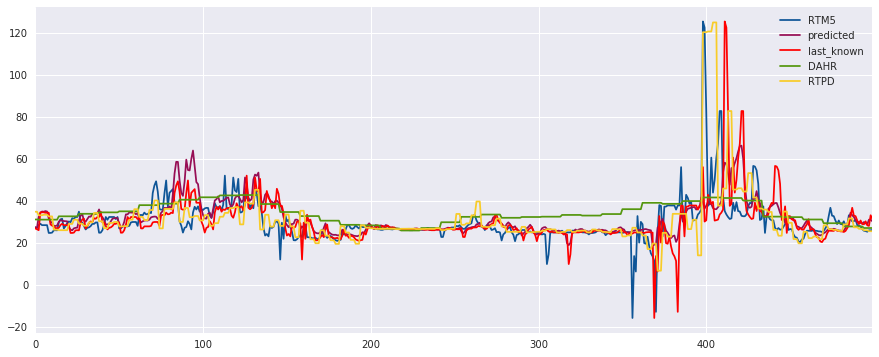

In [52]:
fig, ax = plt.subplots(figsize = (15,6))

sns.tsplot(data=y_test['EMBRCDR_2_N104'][0:500],color = '#0E5597', ax=ax, legend = True, condition ='RTM5')
sns.tsplot(data=test_set_pred[0:500],color = '#970E55', ax=ax, legend = True, condition = 'predicted')
sns.tsplot(data=X_test['targ_5_prior'][0:500], color='red', ax=ax, legend=True, condition='last_known')
sns.tsplot(data=market_test['True_DAHR'][0:500], color='#55970E', ax=ax, legend=True, condition='DAHR')
sns.tsplot(data=market_test['True_RTPD'][0:500], color='#F8CC29', ax=ax, legend=True, condition='RTPD')


In [53]:
y[0:4]

,EMBRCDR_2_N104
datetime,
2015-01-01 10:00:00,50.58662
2015-01-01 10:05:00,50.58662
2015-01-01 10:10:00,50.58662
2015-01-01 10:15:00,50.57101


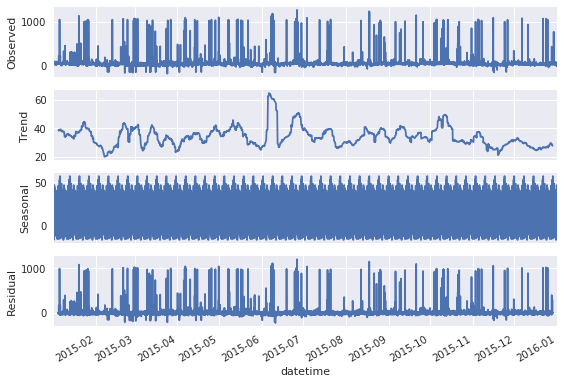

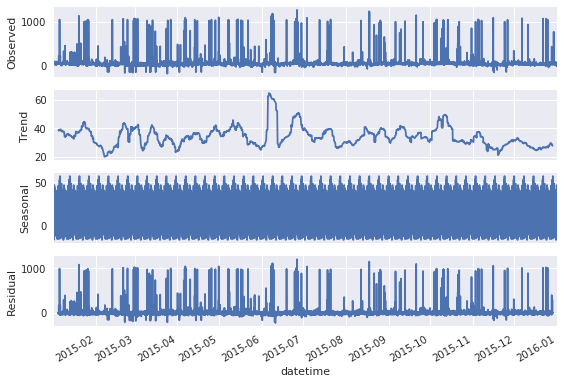

In [54]:
series = y
week_seasonal_decomp = seasonal_decompose(series.EMBRCDR_2_N104, model='additive', freq=2016)
week_trend = week_seasonal_decomp.trend
week_seasonal = week_seasonal_decomp.seasonal
week_residual = week_seasonal_decomp.resid
week_seasonal_decomp.plot()

In [55]:
#week_seasonal_decomp.resid

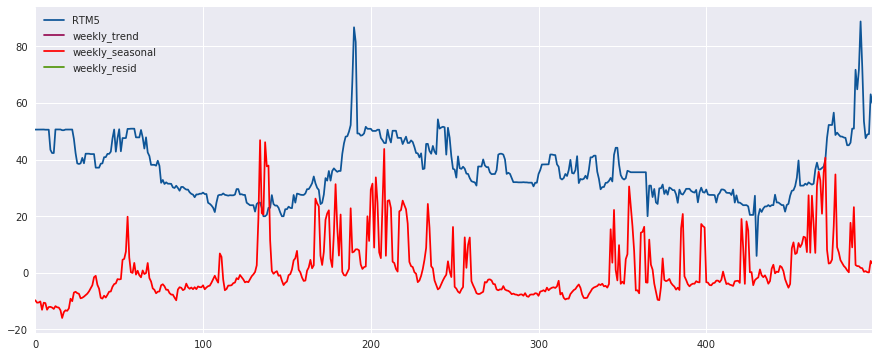

In [56]:
fig, ax = plt.subplots(figsize = (15,6))

sns.tsplot(data=y['EMBRCDR_2_N104'][0:500],color = '#0E5597', ax=ax, legend = True, condition ='RTM5')
sns.tsplot(data=week_trend[0:500],color = '#970E55', ax=ax, legend = True, condition = 'weekly_trend')
sns.tsplot(data=week_seasonal[0:500], color='red', ax=ax, legend=True, condition='weekly_seasonal')
sns.tsplot(data=week_residual[0:500], color='#55970E', ax=ax, legend=True, condition='weekly_resid')



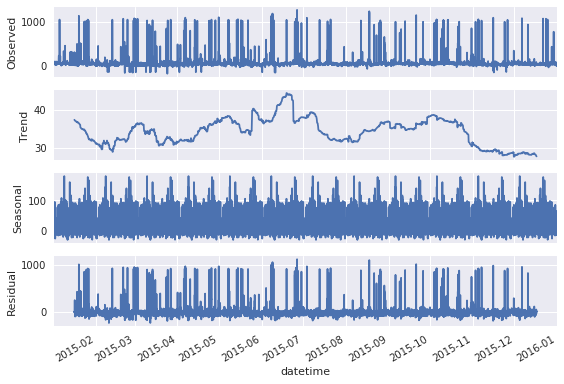

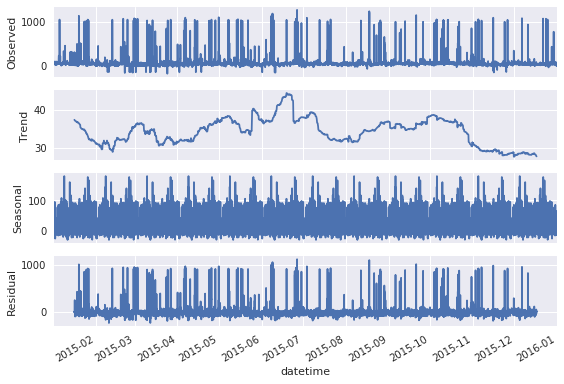

In [57]:
series = y
month_seasonal_decomp = seasonal_decompose(series.EMBRCDR_2_N104, model='additive', freq=8640)
month_trend = month_seasonal_decomp.trend
month_seasonal = month_seasonal_decomp.seasonal
month_residual = month_seasonal_decomp.resid
month_seasonal_decomp.plot()

In [58]:
#month_trend[0:10]

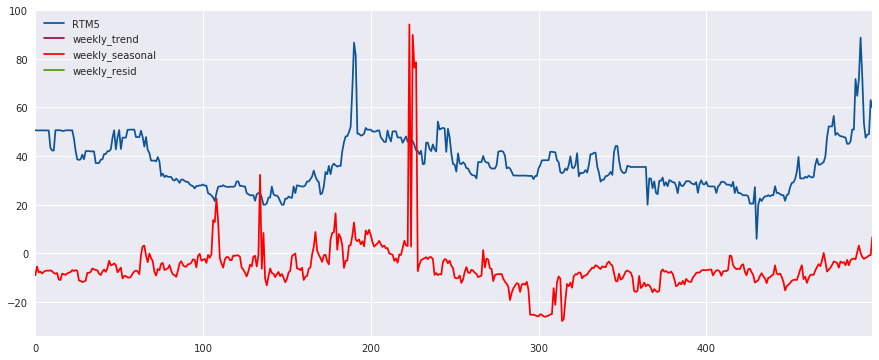

In [59]:
fig, ax = plt.subplots(figsize = (15,6))

sns.tsplot(data=y['EMBRCDR_2_N104'][0:500],color = '#0E5597', ax=ax, legend = True, condition ='RTM5')
sns.tsplot(data=month_trend[0:500],color = '#970E55', ax=ax, legend = True, condition = 'weekly_trend')
sns.tsplot(data=month_seasonal[0:500], color='red', ax=ax, legend=True, condition='weekly_seasonal')
sns.tsplot(data=month_residual[0:500], color='#55970E', ax=ax, legend=True, condition='weekly_resid')



In [63]:
#Try to ensemble random forest and lasso
sample_size = -1
X_mod = X[0:sample_size]
y_mod = y_series[0:sample_size]
true_market_mod = true_market[0:sample_size]

std = StandardScaler()

#produce kfolds of data w/ n_splits folds/splits
kf = KFold(n_splits=5, shuffle = False)

###X_train, X_test, y_train, y_test, market_train, market_test = train_test_split(X_mod, y_mod, true_market_mod, test_size=0.3,random_state=42)

for train_index, test_index in kf.split(X_mod):    #loop over the folds
    X_train, X_test = X_mod.iloc[train_index], X_mod.iloc[test_index]#create training and test independent variable data without scaling
    std.fit(X_train) #apply fit only only training ddata
    X_tr, X_te = std.transform(X_train), std.transform(X_test)    #apply standard scaler and use to find best alpha
                         
    y_train, y_test = y_mod.iloc[train_index], y_mod.iloc[test_index]    #create training and test dependent variable data
        
    market_train, market_test = true_market_mod.iloc[train_index], true_market_mod.iloc[test_index]                  
    

model1 = RandomForestRegressor(n_estimators = 1000, min_samples_leaf=500, max_features = 'sqrt', n_jobs=-1)
model_1_results = model1.fit(X_tr,y_train)
R2_model_1_score = model1.score(X_te, y_test)
model_1_test_set_pred = model1.predict(X_te)
model_1_rms_err = np.sqrt(np.mean((model_1_test_set_pred - y_test)**2))
print("R2 score for Random Forest:", R2_model_1_score)
print("RMS error for Random Forest:", model_1_rms_err)

model2 = Lasso(alpha = 0.6)  
model_2_results = model2.fit(X_tr,y_train) #fit the model
R_2_score_model2 = model2.score(X_te, y_test)
model_2_test_set_pred = model2.predict(X_te)
model_2_rms_err = np.sqrt(np.mean((model_2_test_set_pred - y_test)**2))

print("R2 score for Lasso:", R_2_score_model2)
print("RMS error for Lasso:", model_2_rms_err)

ensemble_test_pred = (model_1_test_set_pred + model_2_test_set_pred)/2
ensemble_RMS_err = np.sqrt(np.mean((ensemble_test_pred - y_test)**2))
ensemble_residuals = (ensemble_test_pred - y_test)
print("R2 score for Ensemble:", r2_score(y_test, ensemble_test_pred))
print("RMS error for Ensemble:", ensemble_RMS_err)

lagging_RMS_err = np.sqrt(np.mean((X_test['targ_5_prior'] - y_test)**2))
print("R2 score for lagging the market:", r2_score(y_test, X_test['targ_5_prior']))
print("RMS error for lagging the market:", lagging_RMS_err)


feature_coeffs = list(zip(X_train.columns, model2.coef_))

print("This means that in order of impact on model results, features and their coefficients from most to least impact per unit of the feature are:")

feature_importance_list = sorted(feature_coeffs, key = lambda x: abs(x[1]), reverse = True)

for i in range(0, len(feature_importance_list[0:30])):
    print(feature_importance_list[i])
    
rf_feature_coeffs = list(zip(X_train.columns, model1.feature_importances_))

print("This means that in order of impact on model results, features and their importances from most to least splits on the feature are:")

rf_feature_importance_list = sorted(rf_feature_coeffs, key = lambda x: abs(x[1]), reverse = True)

for i in range(0, len(rf_feature_importance_list[0:20])):
    print(rf_feature_importance_list[i])
    


R2 score for Random Forest: 0.0141738299198
RMS error for Random Forest: 45.4508232443
R2 score for Lasso: -0.00455435616158
RMS error for Lasso: 45.8805170074
R2 score for Ensemble: 0.0132362428898
RMS error for Ensemble: 45.4724315036
R2 score for lagging the market: -0.840935136892
RMS error for lagging the market: 62.1098994208
This means that in order of impact on model results, features and their coefficients from most to least impact per unit of the feature are:
('target_RTPD_lmp_EMBRCDR_2_N104', 6.7522272310342757)
('load_MW', 3.1641225327800524)
('JENNY_1_N001_win2_rollmean', 2.6023133850146256)
('JENNY_1_N001', 2.2118995832633117)
('target_DAHR_lmp_EMBRCDR_2_N104', 2.1739694744995663)
('other_15_diff', 1.6420248840765244)
("('DNI', '33.91_-116.63')", -1.5892838514118057)
('ELPATIO_1_N015_60_prior', 1.4386264580481343)
('ELPATIO_1_N015_55_prior', 1.0938804234798525)
("('Dew Point', '37.780090431_-122.38')60_prior", -1.0713882974400282)
('load_MW_15_diff', 1.0709516702689208)
(

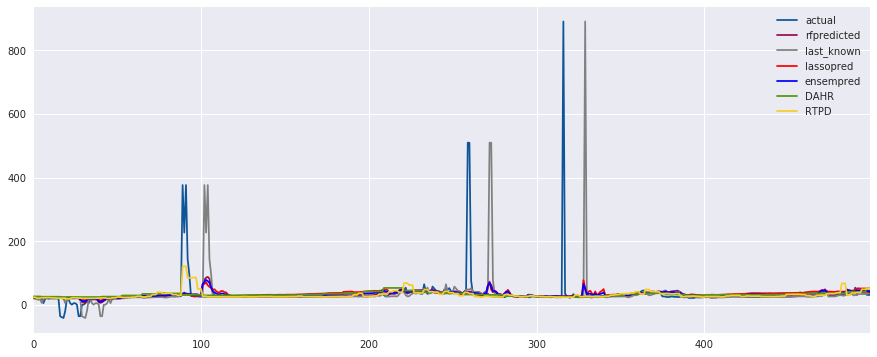

In [65]:
fig, ax = plt.subplots(figsize = (15,6))
sns.tsplot(data=y_test[0:500],  color = '#0E5597', ax=ax, legend=True, condition='actual')
sns.tsplot(data=model_1_test_set_pred[0:500],color = '#970E55', ax=ax, legend = True, condition = 'rfpredicted')
sns.tsplot(data=X_test['targ_5_prior'][0:500], color='grey', ax=ax, legend=True, condition='last_known')
sns.tsplot(data=model_2_test_set_pred[0:500], color= 'red', ax=ax, legend=True, condition = 'lassopred')
sns.tsplot(data=ensemble_test_pred[0:500], color='blue', ax=ax, legend=True, condition='ensempred')
sns.tsplot(data=market_test['True_DAHR'][0:500], color='#55970E', condition ='DAHR')
sns.tsplot(data=market_test['True_RTPD'][0:500], color='#F8CC29', condition='RTPD')

In [66]:
random_forest_set_pred_df = pd.DataFrame(model_1_test_set_pred)
random_forest_set_pred_df .rename(columns={0:'random_forest_predicted_RTM5'}, inplace=True)
lasso_set_pred_df = pd.DataFrame(model_2_test_set_pred)
lasso_set_pred_df .rename(columns={0:'lasso_predicted_RTM5'}, inplace=True)
ensemble_set_pred_df = pd.DataFrame(ensemble_test_pred)
ensemble_set_pred_df .rename(columns={0:'ensemble_predicted_RTM5'}, inplace=True)
market_df = market_test.copy()
market_df.reset_index(inplace=True)
y_test_df = pd.DataFrame(y_test)
y_test_df.reset_index(inplace=True)
most_recent_data = pd.DataFrame(X_test['targ_5_prior'])
most_recent_data.reset_index(inplace=True)
control_storage_profit_df = pd.concat([y_test_df, random_forest_set_pred_df, lasso_set_pred_df, ensemble_set_pred_df], axis=1)
control_storage_profit_df = pd.merge(control_storage_profit_df, market_df, how ='outer', on='datetime').merge(most_recent_data, how='outer', on='datetime')
control_storage_profit_df['min_freq_period'] = 5

In [67]:
kWh_full = 210
full = (kWh_full/1000)
smart_SOC = [full]
SOC_15 = [full]
DAHR_SOC = [full]
SOC_perfect = [full]
SOC_last_as_pred = [full]
resilience_percent = 0
capacity_kW = 50
MW = (capacity_kW/1000)
h = (5/60)
retail_rate = 16

In [68]:
def choose_smart_charge_or_discharge(row):
    if row['ensemble_predicted_RTM5'] > row['True_DAHR']:
        discharge = 1
    if row['ensemble_predicted_RTM5'] < row['True_DAHR']:
        discharge = -1
    return discharge    

In [69]:
def choose_DAHR_charge_or_discharge(row):
    if row['True_DAHR'] > retail_rate:
        discharge =1
    if row['True_DAHR'] <= retail_rate:
        discharge =-1
    return discharge    

In [70]:
def choose_15min_dumb_charge_or_discharge(row):
    if row['True_RTPD'] > row['True_DAHR']:
        discharge = 1
    if row['True_RTPD'] <= row['True_DAHR']:
        discharge = -1
    return discharge
        

In [71]:
def choose_perfect_foresight_charge_or_discharge(row):
    if row['EMBRCDR_2_N104'] > row['True_DAHR']:
        discharge = 1
    if row['EMBRCDR_2_N104'] <= row['True_DAHR']:
        discharge = -1
    return discharge

In [72]:
def choose_last_as_pred_charge_or_discharge(row):
    if row['targ_5_prior'] > row['True_DAHR']:
        discharge = 1
    if row['targ_5_prior'] <=row['True_DAHR']:
        discharge = -1
    return discharge    

In [73]:
control_storage_profit_df['smart_discharge_or_charge'] = control_storage_profit_df.apply(choose_smart_charge_or_discharge, axis=1)
control_storage_profit_df['15_min_dumb_discharge_or_charge'] = control_storage_profit_df.apply(choose_15min_dumb_charge_or_discharge, axis =1)
control_storage_profit_df['perfect_foresight_discharge_or_charge'] = control_storage_profit_df.apply(choose_perfect_foresight_charge_or_discharge, axis =1)
control_storage_profit_df['DAHR_discharge_or_charge'] = control_storage_profit_df.apply(choose_DAHR_charge_or_discharge, axis=1)
control_storage_profit_df['5_prior_pred_discharge_or_charge'] = control_storage_profit_df.apply(choose_last_as_pred_charge_or_discharge, axis=1)
control_storage_profit_df = control_storage_profit_df.set_index(pd.DatetimeIndex(control_storage_profit_df['datetime']))
control_storage_profit_df.head(1)

,datetime,EMBRCDR_2_N104,random_forest_predicted_RTM5,lasso_predicted_RTM5,ensemble_predicted_RTM5,True_DAHR,True_RTPD,targ_5_prior,min_freq_period,smart_discharge_or_charge,15_min_dumb_discharge_or_charge,perfect_foresight_discharge_or_charge,DAHR_discharge_or_charge,5_prior_pred_discharge_or_charge
datetime,,,,,,,,,,,,,,
2015-10-20 07:35:00,2015-10-20 07:35:00,23.25644,21.946731,23.986238,22.966485,25.9186,23.20044,19.54798,5,-1,-1,-1,1,-1


In [74]:
smart_discharge_choice = list(pd.Series(control_storage_profit_df['smart_discharge_or_charge']))
dumb_15_discharge_choice = list(pd.Series(control_storage_profit_df['15_min_dumb_discharge_or_charge']))
perfect_discharge_choice = list(pd.Series(control_storage_profit_df['perfect_foresight_discharge_or_charge']))
DAHR_discharge_choice = list(pd.Series(control_storage_profit_df['DAHR_discharge_or_charge']))
last_as_pred_discharge_choice = list(pd.Series(control_storage_profit_df['5_prior_pred_discharge_or_charge']))

In [75]:
len(smart_discharge_choice), len(dumb_15_discharge_choice), len(perfect_discharge_choice), len(DAHR_discharge_choice)

(21017, 21017, 21017, 21017)

In [76]:
actual_smart_discharge_choice=[]
for n in range(0, len(smart_discharge_choice)):
    if (smart_discharge_choice[n] <0) & (smart_SOC[-1] < full):
        smart_SOC.append(smart_SOC[-1]+h*MW)
        actual_smart_discharge_choice.append(-1)
    elif (smart_discharge_choice[n] >0) & (smart_SOC[-1] >= full*resilience_percent):
        smart_SOC.append(smart_SOC[-1]-h*MW)
        actual_smart_discharge_choice.append(1)
    else:
        smart_SOC.append(smart_SOC[-1])
        actual_smart_discharge_choice.append(0)
        

In [77]:
actual_last_pred_discharge_choice=[]
for n in range(0, len(smart_discharge_choice)):
    if (last_as_pred_discharge_choice[n] <0) & (SOC_last_as_pred[-1] < full):
        SOC_last_as_pred.append(SOC_last_as_pred[-1]+h*MW)
        actual_last_pred_discharge_choice.append(-1)
    elif (last_as_pred_discharge_choice[n] >0) & (SOC_last_as_pred[-1] >= full*resilience_percent):
        SOC_last_as_pred.append(SOC_last_as_pred[-1]-h*MW)
        actual_last_pred_discharge_choice.append(1)
    else:
        SOC_last_as_pred.append(SOC_last_as_pred[-1])
        actual_last_pred_discharge_choice.append(0)
        

In [78]:
actual_DAHR_discharge_choice=[]
for n in range(0, len(DAHR_discharge_choice)):
    if (DAHR_discharge_choice[n] <0) & (DAHR_SOC[-1] < full):
        DAHR_SOC.append(DAHR_SOC[-1]+h*MW)
        actual_DAHR_discharge_choice.append(-1)
    elif (DAHR_discharge_choice[n] >0) & (DAHR_SOC[-1] >= full*resilience_percent):
        DAHR_SOC.append(DAHR_SOC[-1]-h*MW)
        actual_DAHR_discharge_choice.append(1)
    else:
        DAHR_SOC.append(DAHR_SOC[-1])
        actual_DAHR_discharge_choice.append(0)
        

In [79]:
actual_perfect_discharge_choice=[]
#count = 0
for n in range(0, len(perfect_discharge_choice)):
    if (perfect_discharge_choice[n] <0) & (SOC_perfect[-1] < full):
            SOC_perfect.append(SOC_perfect[-1]+h*MW)
            actual_perfect_discharge_choice.append(-1)
#            count +=1
#            print(count, "charge",  n)
    elif (perfect_discharge_choice[n] >0) & (SOC_perfect[-1] >= full*resilience_percent):
            SOC_perfect.append(SOC_perfect[-1]-h*MW)
            actual_perfect_discharge_choice.append(1)
#            count+=1
#            print(count, "discharge", n)
    else:
        SOC_perfect.append(SOC_perfect[-1])
        actual_perfect_discharge_choice.append(0)
#        count+=1
#        print(count, "do nothing", n)
        

In [80]:
actual_15_dumb_discharge_choice=[]
for n in range(0, len(dumb_15_discharge_choice)):
    if (dumb_15_discharge_choice[n] <0) & (SOC_15[-1] < full):
        SOC_15.append(SOC_15[-1]+h*MW)
        actual_15_dumb_discharge_choice.append(-1)
    elif (dumb_15_discharge_choice[n] >0) & (smart_SOC[-1] >= full*resilience_percent):
        SOC_15.append(SOC_15[-1]-h*MW)
        actual_15_dumb_discharge_choice.append(1)
    else:
        SOC_15.append(SOC_15[-1])
        actual_15_dumb_discharge_choice.append(0)
        

In [81]:
len(actual_last_pred_discharge_choice),len(actual_15_dumb_discharge_choice), len(SOC_15), len(actual_perfect_discharge_choice), len(actual_smart_discharge_choice)

(21017, 21017, 21018, 21017, 21017)

In [82]:
control_storage_profit_df['actual_smart_discharge_or_charge'] = actual_smart_discharge_choice
control_storage_profit_df['actual_15_dumb_discharge_or_charge'] = actual_15_dumb_discharge_choice
control_storage_profit_df['actual_perfect_foresight_discharge_or_charge'] = actual_perfect_discharge_choice
control_storage_profit_df['actual_DAHR_discharge_or_charge'] = actual_DAHR_discharge_choice
control_storage_profit_df['actual_last_pred_discharge_or_charge'] = actual_last_pred_discharge_choice
control_storage_profit_df['smart_SOC'] = smart_SOC[0:len(actual_smart_discharge_choice)]
control_storage_profit_df['SOC_last_as_pred'] = SOC_last_as_pred[0:len(actual_smart_discharge_choice)]
control_storage_profit_df['15m_SOC'] = SOC_15[0:len(actual_smart_discharge_choice)]
control_storage_profit_df['perfect_SOC'] = SOC_perfect[0:len(actual_smart_discharge_choice)]
control_storage_profit_df['DAHR_SOC'] = DAHR_SOC[0:len(actual_smart_discharge_choice)]
control_storage_profit_df['smart_SOC'] = control_storage_profit_df['smart_SOC'].apply(lambda x: float(x)*1000)
control_storage_profit_df['15m_SOC'] = control_storage_profit_df['15m_SOC'].apply(lambda x: float(x)*1000)
control_storage_profit_df['perfect_SOC'] = control_storage_profit_df['perfect_SOC'].apply(lambda x: float(x)*1000)
control_storage_profit_df['DAHR_SOC'] = control_storage_profit_df['DAHR_SOC'].apply(lambda x: float(x)*1000)
control_storage_profit_df['SOC_last_as_pred'] = control_storage_profit_df['SOC_last_as_pred'].apply(lambda x: float(x)*1000)

control_storage_profit_df.head(1)

,datetime,EMBRCDR_2_N104,random_forest_predicted_RTM5,lasso_predicted_RTM5,ensemble_predicted_RTM5,True_DAHR,True_RTPD,targ_5_prior,min_freq_period,smart_discharge_or_charge,15_min_dumb_discharge_or_charge,perfect_foresight_discharge_or_charge,DAHR_discharge_or_charge,5_prior_pred_discharge_or_charge,actual_smart_discharge_or_charge,actual_15_dumb_discharge_or_charge,actual_perfect_foresight_discharge_or_charge,actual_DAHR_discharge_or_charge,actual_last_pred_discharge_or_charge,smart_SOC,SOC_last_as_pred,15m_SOC,perfect_SOC,DAHR_SOC
datetime,,,,,,,,,,,,,,,,,,,,,,,,
2015-10-20 07:35:00,2015-10-20 07:35:00,23.25644,21.946731,23.986238,22.966485,25.9186,23.20044,19.54798,5,-1,-1,-1,1,-1,0,0,0,1,0,210.0,210.0,210.0,210.0,210.0


In [83]:
def get_smart_profit_or_cost(row):
    if row['actual_smart_discharge_or_charge']<=0:
        #Utility profit        
        #profit = row['EMBRCDR_2_N104']*row['actual_smart_discharge_or_charge']*MW*h
        #Commercial cost
        profit = retail_rate*row['actual_smart_discharge_or_charge']*MW*h
        #cost in relation to DAHR
        #profit=0
        #profit = row['True_DAHR']*row['actual_smart_discharge_or_charge']*MW*h
    if row['actual_smart_discharge_or_charge'] >0:  
        profit = row['EMBRCDR_2_N104']*row['actual_smart_discharge_or_charge']*MW*h
    return profit

def get_last_pred_profit_or_cost(row):
    if row['actual_last_pred_discharge_or_charge']<=0:
        #Utility profit        
        #profit = row['EMBRCDR_2_N104']*row['actual_smart_discharge_or_charge']*MW*h
        #Commercial cost
        profit = retail_rate*row['actual_last_pred_discharge_or_charge']*MW*h
        #cost in relation to DAHR
        #profit=0
        #profit = row['True_DAHR']*row['actual_smart_discharge_or_charge']*MW*h
    if row['actual_last_pred_discharge_or_charge'] >0:  
        profit = row['EMBRCDR_2_N104']*row['actual_last_pred_discharge_or_charge']*MW*h
    return profit

def get_15_profit_or_cost(row):
    if row['actual_15_dumb_discharge_or_charge']<=0:
        #utility profit
        #profit = row['True_RTPD']*row['actual_15_dumb_discharge_or_charge']*MW*h
        #commercial cost
        profit = retail_rate*row['actual_15_dumb_discharge_or_charge']*MW*h
        #cost in relation to DAHR
        #profit=0
        #profit = row['True_DAHR']*row['actual_15_dumb_discharge_or_charge']*MW*h
    if row['actual_15_dumb_discharge_or_charge']>0:
        profit=row['True_RTPD']*row['actual_15_dumb_discharge_or_charge']*MW*h
    return profit

def get_perfect_profit_or_cost(row):
    if row['actual_perfect_foresight_discharge_or_charge']<=0:
        #utility 'cost'
        #profit=row['EMBRCDR_2_N104']*row['actual_perfect_foresight_discharge_or_charge']*MW*h
        #commercial 'cost'
        profit = retail_rate*row['actual_perfect_foresight_discharge_or_charge']*MW*h
        #cost in relation to DAHR
        #profit=0
        #profit = row['True_DAHR']*row['actual_perfect_foresight_discharge_or_charge']
    if row['actual_perfect_foresight_discharge_or_charge']>0:
        profit = row['EMBRCDR_2_N104']*row['actual_perfect_foresight_discharge_or_charge']*MW*h
    return profit

def get_DAHR_profit_or_cost(row):
    if row['actual_DAHR_discharge_or_charge']<=0:
        #commercial 'cost'
        profit = retail_rate*row['actual_DAHR_discharge_or_charge']*MW*h
        #cost in relation to DAHR
        #profit=0
        #profit = row['True_DAHR']*row['actual_perfect_foresight_discharge_or_charge']
    if row['actual_DAHR_discharge_or_charge']>0:
        profit = row['True_DAHR']*row['actual_DAHR_discharge_or_charge']*MW*h
    return profit

In [84]:
control_storage_profit_df['perfect_foresight_profit'] = control_storage_profit_df.apply(get_perfect_profit_or_cost, axis=1)
control_storage_profit_df['smart_profit'] = control_storage_profit_df.apply(get_smart_profit_or_cost, axis=1)
control_storage_profit_df['15_min_dumb_profit'] = control_storage_profit_df.apply(get_15_profit_or_cost, axis=1)
control_storage_profit_df['DAHR_profit'] = control_storage_profit_df.apply(get_DAHR_profit_or_cost, axis=1)
control_storage_profit_df['last_pred_profit'] = control_storage_profit_df.apply(get_last_pred_profit_or_cost, axis =1)

control_storage_profit_df.head()

,datetime,EMBRCDR_2_N104,random_forest_predicted_RTM5,lasso_predicted_RTM5,ensemble_predicted_RTM5,True_DAHR,True_RTPD,targ_5_prior,min_freq_period,smart_discharge_or_charge,15_min_dumb_discharge_or_charge,perfect_foresight_discharge_or_charge,DAHR_discharge_or_charge,5_prior_pred_discharge_or_charge,actual_smart_discharge_or_charge,actual_15_dumb_discharge_or_charge,actual_perfect_foresight_discharge_or_charge,actual_DAHR_discharge_or_charge,actual_last_pred_discharge_or_charge,smart_SOC,SOC_last_as_pred,15m_SOC,perfect_SOC,DAHR_SOC,perfect_foresight_profit,smart_profit,15_min_dumb_profit,DAHR_profit,last_pred_profit
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-10-20 07:35:00,2015-10-20 07:35:00,23.25644,21.946731,23.986238,22.966485,25.9186,23.20044,19.54798,5,-1,-1,-1,1,-1,0,0,0,1,0,210.0,210.0,210.0,210.0,210.000000,0.0,0.0,0.0,0.107994,0.0
2015-10-20 07:40:00,2015-10-20 07:40:00,23.25644,20.768381,23.578855,22.173618,25.9186,23.20044,18.82867,5,-1,-1,-1,1,-1,0,0,0,1,0,210.0,210.0,210.0,210.0,205.833333,0.0,0.0,0.0,0.107994,0.0
2015-10-20 07:45:00,2015-10-20 07:45:00,23.73256,19.939617,22.523544,21.231580,25.9186,20.69763,16.91785,5,-1,-1,-1,1,-1,0,0,0,1,0,210.0,210.0,210.0,210.0,201.666667,0.0,0.0,0.0,0.107994,0.0
2015-10-20 07:50:00,2015-10-20 07:50:00,20.83600,20.949946,22.554391,21.752168,25.9186,20.69763,15.35654,5,-1,-1,-1,1,-1,0,0,0,1,0,210.0,210.0,210.0,210.0,197.500000,0.0,0.0,0.0,0.107994,0.0
2015-10-20 07:55:00,2015-10-20 07:55:00,20.32479,18.817195,21.921036,20.369116,25.9186,20.69763,17.99293,5,-1,-1,-1,1,-1,0,0,0,1,0,210.0,210.0,210.0,210.0,193.333333,0.0,0.0,0.0,0.107994,0.0


In [85]:
control_storage_profit_df.shape

(21017, 29)

In [86]:
control_storage_profit_df.to_csv('control_storage_profit_df.csv')

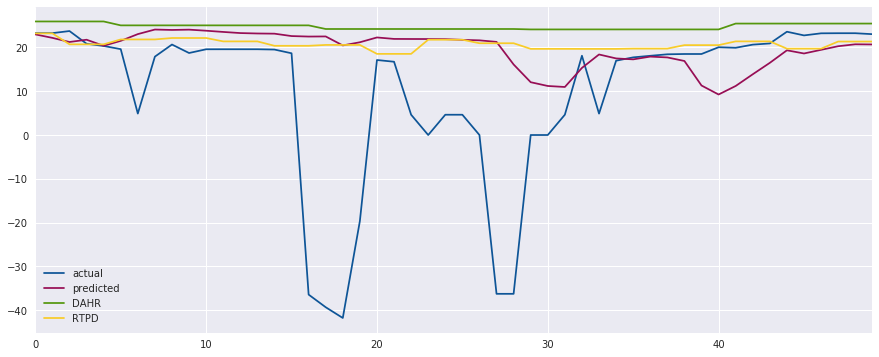

In [88]:
fig, ax = plt.subplots(figsize = (15,6))
sns.tsplot(data=control_storage_profit_df['EMBRCDR_2_N104'][0:50],  color = '#0E5597', ax=ax, legend=True, condition='actual')
sns.tsplot(data=control_storage_profit_df['ensemble_predicted_RTM5'][0:50],color = '#970E55', ax=ax, legend = True, condition = 'predicted')
sns.tsplot(data=control_storage_profit_df['True_DAHR'][0:50], color='#55970E', condition ='DAHR')
sns.tsplot(data=control_storage_profit_df['True_RTPD'][0:50], color='#F8CC29', condition='RTPD')

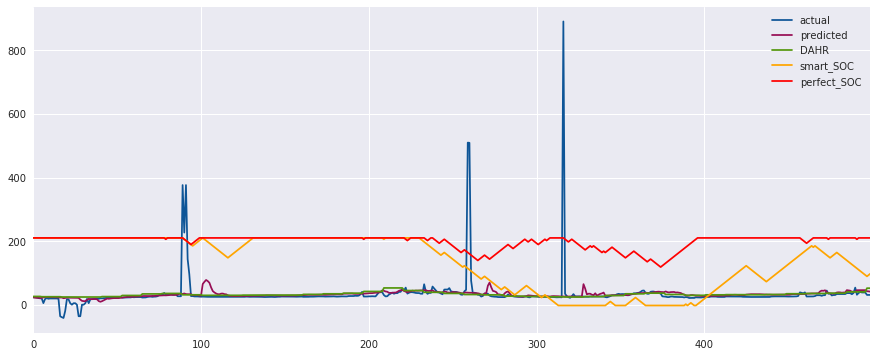

In [89]:
fig, ax = plt.subplots(figsize = (15,6))
sns.tsplot(data=control_storage_profit_df['EMBRCDR_2_N104'][0:500],  color = '#0E5597', ax=ax, legend=True, condition='actual')
sns.tsplot(data=control_storage_profit_df['ensemble_predicted_RTM5'][0:500],color = '#970E55', ax=ax, legend = True, condition = 'predicted')
sns.tsplot(data=control_storage_profit_df['True_DAHR'][0:500], color='#55970E', condition ='DAHR')
sns.tsplot(data=control_storage_profit_df['smart_SOC'][0:500], color='Orange', condition='smart_SOC')
sns.tsplot(data=control_storage_profit_df['perfect_SOC'][0:500], color='Red', condition='perfect_SOC')

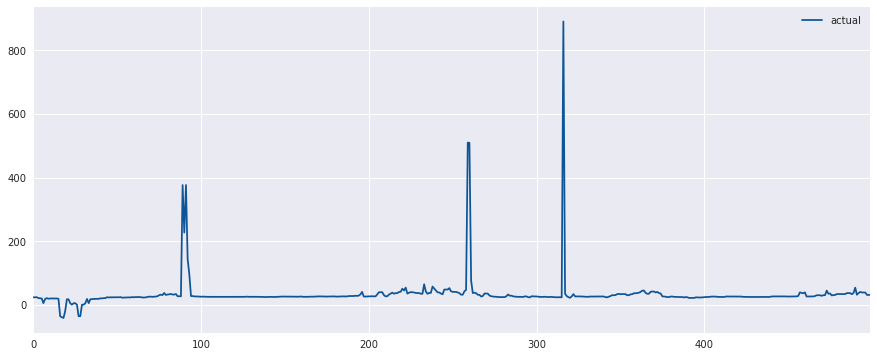

In [90]:
fig, ax = plt.subplots(figsize = (15,6))
sns.tsplot(data=y_test[0:500],  color = '#0E5597', ax=ax, legend=True, condition='actual')

In [91]:
dumb_pred_vec = X['targ_5_prior'][0:sample_size]
rms_err_dumb = np.sqrt(np.mean((dumb_pred_vec - y_test)**2))
print(r2_score(y_series[0:sample_size], dumb_pred_vec), "r2_score")
print(mean_squared_error(y_series[0:sample_size], dumb_pred_vec), "RMS Error")

-0.682765828495 r2_score
6096.28346013 RMS Error


In [92]:
#best_model_residuals[0:10]

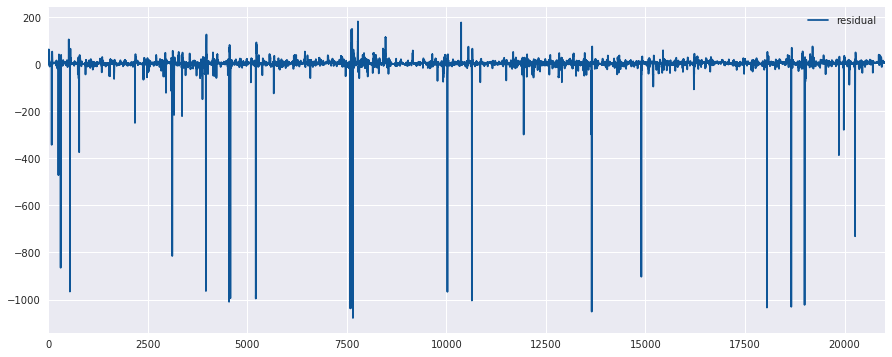

In [93]:
fig, ax = plt.subplots(figsize = (15,6))
sns.tsplot(data=ensemble_residuals,  color = '#0E5597', ax=ax, legend=True, condition='residual')

In [94]:
y_test[0:4]

datetime
2015-10-20 07:35:00    23.25644
2015-10-20 07:40:00    23.25644
2015-10-20 07:45:00    23.73256
2015-10-20 07:50:00    20.83600
Name: EMBRCDR_2_N104, dtype: float64

In [96]:
max(y_series), min(y_series)

(1271.70794, -191.3424)